In [99]:
import pandas as pd
import matplotlib.pyplot as plt

Statistics about the data, including:
* Total sequences
* Top 5 longest and shortest sequences
* Average length of sequences
* Top 5 most and least common sequence length

In [100]:
def stats(dataset):
    dataset["length"].hist(bins=100)
    plt.show()

    print("-" * 40)

    print("Total sequences:", dataset.shape[0])

    print("-" * 40)

    print("Top 5 longest sequences:")
    print("id     length")
    print(dataset["length"].nlargest(5).to_string())

    print("-" * 40)

    print("Top 5 shortest sequences:")
    print("id      length")
    print(dataset["length"].nsmallest(5).to_string())

    print("-" * 40)

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("-" * 40)

    print("Top 5 most common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nlargest(5).to_string())
    
    print("-" * 40)

    print("Top 5 least common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nsmallest(5).to_string())

(2010, 2)
(23443, 2)


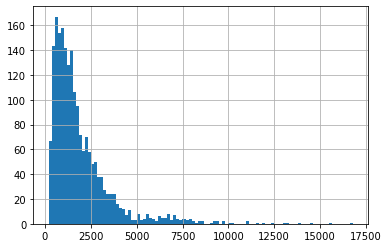

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


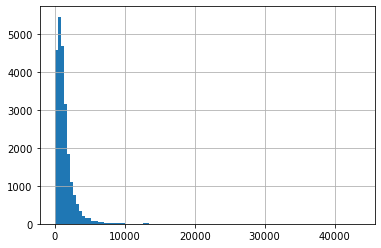

----------------------------------------
Total sequences: 23443
----------------------------------------
Top 5 longest sequences:
id     length
18388    43524
9456     21246
18860    20724
12474    20658
18460    18921
----------------------------------------
Top 5 shortest sequences:
id      length
6306      3
13646     5
12591    10
20617    10
22266    10
----------------------------------------
Average length: 1355.8615364927698
----------------------------------------
Top 5 most common lengths:
length  count
939    98
945    76
930    72
444    63
948    62
----------------------------------------
Top 5 least common lengths:
length  count
907      1
6948     1
685      1
6300     1
11796    1


In [101]:
positive = pd.read_csv("datasets/essential_genes/positive.csv")
print(positive.shape)

negative = pd.read_csv("datasets/essential_genes/negative_unique.csv")
print(negative.shape)

# add a column that contains length of the sequence
positive["length"] = positive["sequence"].apply(len)
negative["length"] = negative["sequence"].apply(len)

stats(positive)
print("*" * 100)
stats(negative)

Total positive sequences length smaller than 50: 0
Total negative sequences length smaller than 50: 67


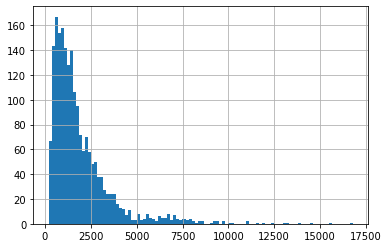

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


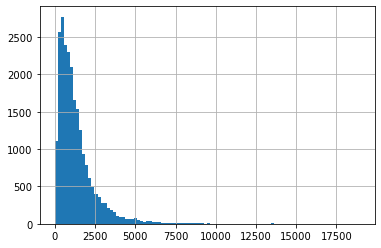

----------------------------------------
Total sequences: 23439
----------------------------------------
Top 5 longest sequences:
id     length
18460    18921
2683     17673
11861    17388
20417    17289
22192    16965
----------------------------------------
Top 5 shortest sequences:
id      length
6306      3
13646     5
12591    10
20617    10
22266    10
----------------------------------------
Average length: 1351.5640599001663
----------------------------------------
Top 5 most common lengths:
length  count
939    98
945    76
930    72
444    63
948    62
----------------------------------------
Top 5 least common lengths:
length  count
2755    1
1237    1
3420    1
2221    1
50      1


In [102]:
# count how many sequences length smaller than 50
total_positive = 0
for length in positive["length"]:
    if length < 50:
        total_positive += 1
print("Total positive sequences length smaller than 50:", total_positive)

total_negative = 0
for length in negative["length"]:
    if length < 50:
        total_negative += 1
print("Total negative sequences length smaller than 50:", total_negative)

# remove sequences with length bigger than 20000
positive = positive[positive["length"] < 20000]
negative = negative[negative["length"] < 20000]

stats(positive)
print("*" * 100)
stats(negative)

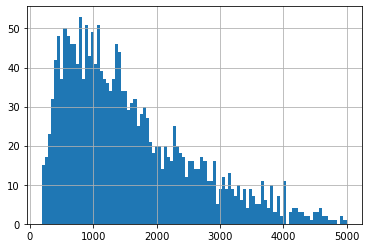

----------------------------------------
Total sequences: 1897
----------------------------------------
Top 5 longest sequences:
id     length
740    4995
65     4911
260    4899
624    4821
984    4782
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1574.1201897733263
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
882     7
555     7
1314    7
----------------------------------------
Top 5 least common lengths:
length  count
2097    1
3282    1
1407    1
927     1
2313    1
****************************************************************************************************


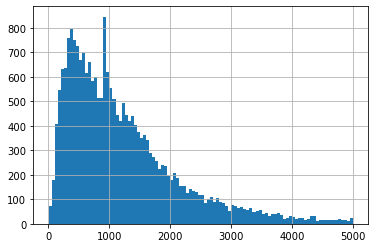

----------------------------------------
Total sequences: 22909
----------------------------------------
Top 5 longest sequences:
id     length
6011    4998
289     4992
1889    4992
2485    4992
2965    4992
----------------------------------------
Top 5 shortest sequences:
id      length
6306      3
13646     5
12591    10
20617    10
22266    10
----------------------------------------
Average length: 1211.6232485049543
----------------------------------------
Top 5 most common lengths:
length  count
939    98
945    76
930    72
444    63
948    62
----------------------------------------
Top 5 least common lengths:
length  count
814     1
1003    1
4899    1
887     1
4722    1


In [103]:
positive = positive[positive["length"] < 5000]
negative = negative[negative["length"] < 5000]

stats(positive)
print("*" * 100)
stats(negative)

In [104]:
positive["label"] = 1
negative["label"] = 0

dataset = pd.concat([positive, negative])

# remove length column
dataset = dataset.drop(columns=["length"])

cutting_length = 2000

# cut sequences to the cutting length
dataset["sequence"] = dataset["sequence"].apply(lambda x: x[:cutting_length])

# fill with "N" the sequences that are shorter than cutting length
dataset["sequence"] = dataset["sequence"].apply(lambda x: x.ljust(cutting_length, "N"))

print(dataset.shape)

# write dataset to csv
dataset.to_csv("datasets/essential_genes/dataset_cut.csv", index=False)

(24806, 3)


Save fps_x and fps_y as to pickle file.

In [105]:
import pickle
fps_y = dataset['label'].values
fps_x = dataset['sequence'].values

with open('datasets/essential_genes/fps_x.pkl', 'wb') as f:
    pickle.dump(fps_x, f)
    
with open("datasets/essential_genes/fps_y.pkl", "wb") as f:
    pickle.dump(fps_y, f)